# Import des libraries

In [6]:
import numpy as np
import pandas as pd
import itertools
import re
import time
import matplotlib.pyplot as plt
import psutil

# Algorithme Graant.

In [2]:
def generateMatrixOfSingle(dataset, attribut, sign='plus'):
        a = list()
        f_list = list()
        for i in range(len(dataset[attribut])):
            for j in range(len(dataset[attribut])):
                if i == j :
                    a.append(0)
                else:
                    if(dataset[attribut][j] >= dataset[attribut][i]):
                        a.append(1)
                    else:
                        a.append(0)
            f_list.append(a)
            a = list()

        f_list = np.array(f_list)
        for i in range(f_list.shape[0]):
            for j in range(f_list.shape[1]):
                if(f_list[i][j] == 1):
                    f_list[j][i] = 0
        return np.array(f_list)

def generateMatrixOfSingleinf(dataset, attribut, sign='moin'):
        a = list()
        f_list = list()
        for i in range(len(dataset[attribut])):
            for j in range(len(dataset[attribut])):
                if i == j :
                    a.append(0)
                else:
                    if(dataset[attribut][j] <= dataset[attribut][i]):
                        a.append(1)
                    else:
                        a.append(0)
            f_list.append(a)
            a = list()

        f_list = np.array(f_list)
        for i in range(f_list.shape[0]):
            for j in range(f_list.shape[1]):
                if(f_list[i][j] == 1):
                    f_list[j][i] = 0
        return np.array(f_list)

In [3]:
def purify(list_set_string):
    dechet = []
    not_complementrary = []
    for elm in list_set_string:
        p = list(map(lambda x: x.replace('+','').replace('-',''),list(elm)))
        if len(p) != len(set(p)):
            dechet.append(elm)
    for de in dechet:
        list_set_string.remove(de)

In [4]:
def generatPatern(dataset, minsup):
    pattern = dict()
    attributs = list(dataset.columns)
    for i in attributs :
        matrix_plus = generateMatrixOfSingle(dataset,i, sign='plus')
        matrix_moin = generateMatrixOfSingleinf(dataset,i,'moin')
        sup_plus = computeSupportGraant(matrix_plus)
        sup_moin = computeSupportGraant(matrix_moin)
        if(sup_plus >= minsup):
            pattern[i+'+'] = (matrix_plus, sup_plus)

        if(sup_moin >= minsup):
            pattern[i+'-'] = (matrix_moin, sup_moin)
    return pattern


In [5]:
def findsubsets(s, n):
    return list(map(set,itertools.combinations(s, n)))

In [6]:
def reunion(list_set):
    if len(list_set) <= 1: return list_set
    else :
      lest_init = set()
      for i in range(len(list_set)):
        lest_init = lest_init.union(list_set[i])
    return lest_init

In [7]:
def print_pattern_mined(patterns):
    for key, value in zip(patterns.keys(),patterns.values()):
        print(f"{key} ({value[1]}) ({value[2]})")
    print(f"{len(patterns)} patterns mined")

    return len(patterns)

In [8]:
def parents(son, matrix):
    element_parent = list()
    for line in range(matrix.shape[0]):
        if(matrix[line][son] == 1):
            element_parent.append(line)
    return element_parent

In [9]:
def getSongs(father, matrix):
    sons = list()
    for col in range(len(matrix[father])):
        if(matrix[father][col] == 1):
            sons.append(col)
    return sons

In [10]:
def getLeafs(matrix):
    leafs = list()
    for line_index in range(matrix.shape[0]):
        if sum(matrix[line_index]) == 0:
            leafs.append(line_index)
    return leafs

In [11]:
def produit(terme):
    if len(terme) == 0:
        return 1
    else:
        return terme[0] * produit(terme[1::])

In [12]:
def somme(terme):
    if len(terme) == 0:
        return 1
    else:
        return terme[0] + somme(terme[1::])

In [13]:
def computeSupportGraant(matrix):
    return np.sum(matrix)


In [14]:
def generatItemsetPatternGraant(dataset, minsup):
    frequent_pattern = generatPatern(dataset, minsup)
    new_patterns = dict()
    frequents = set(frequent_pattern.keys())
    for num in range(2, len(dataset.columns) + 1):
        frequents = findsubsets(frequents, num)
        purify(frequents)
        for i in frequents :
            str = ' , '.join(e for e in list(i))


            matrix = produit(list(map(lambda x:frequent_pattern[x][0], list(i))))
            support = computeSupportGraant(matrix)

            if(support >= minsup):
                new_patterns[str] = (matrix,support)


            support = computeSupportGraant(matrix)

            if(support >= minsup):
                        new_patterns[str] = (matrix,support)


        if(len(new_patterns) == 0): break

        frequent_pattern.update(new_patterns)
        frequents = reunion(list(map(lambda x:set(re.split(' , ',x)), list(new_patterns.keys()))))
        new_patterns = dict()

    return frequent_pattern

In [15]:
from tqdm import tqdm

#  chargement des dataset

In [16]:
datasets = ['datasets/dataset.csv']

In [17]:
les_dataset = list(map(lambda x: pd.read_csv(x, sep=' '), datasets))

In [18]:
les_dataset[0]

,1,2,3,4,5,7,8,9,10,11
0,67108,522,257,736,5114,2151,1589,14,23,71
1,18676,620,325,817,6172,2450,1909,17,22,79
2,10051,746,390,858,8049,2053,1737,5,18,62
3,7091,529,291,780,5430,1695,1229,14,13,50
4,56857,542,312,1068,4620,1743,1104,7,15,46
...,...,...,...,...,...,...,...,...,...,...
195,25006,517,244,905,5107,2102,1469,21,23,129
196,35618,532,257,803,5310,2519,1887,20,13,153
197,41751,546,332,724,6628,2926,2535,11,21,171
198,29774,685,376,736,7940,2484,2191,23,24,235


In [70]:
from tqdm import tqdm

In [22]:
elem = generatItemsetPatternGraant(les_dataset[0], 2415)
len(elem) #10 - 230 #20 - 42 #25 - 35, 50-20,50-42

3693

In [9]:
minsup_grite = [50, 55, 60, 65, 70] 
nbr_patterns_grite = [20, 25, 30, 35, 45]

In [10]:
minsup_graank = np.array([1225,1485,1770,2080,2415])/10 
nbr_patterns_graank = np.array([8713, 7101, 5726, 4608, 3693])/50

<Figure size 1200x400 with 0 Axes>

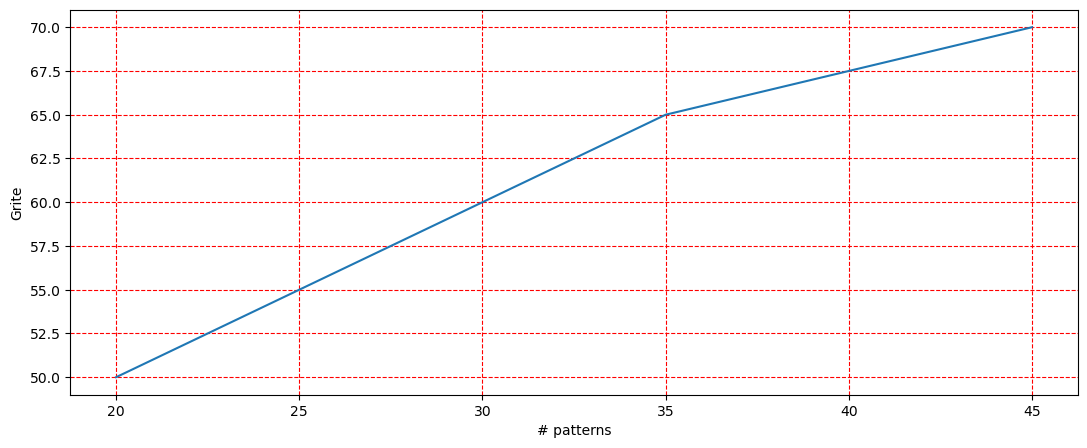

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
fig, ax1 = plt.subplots(figsize=(13, 5))
plt.grid(color='red', linestyle='--')
plt.title("")
plt.xlabel("# patterns")
plt.ylabel("Grite")

ax1.plot(nbr_patterns_grite,minsup_grite)

plt.show()

<Figure size 1200x400 with 0 Axes>

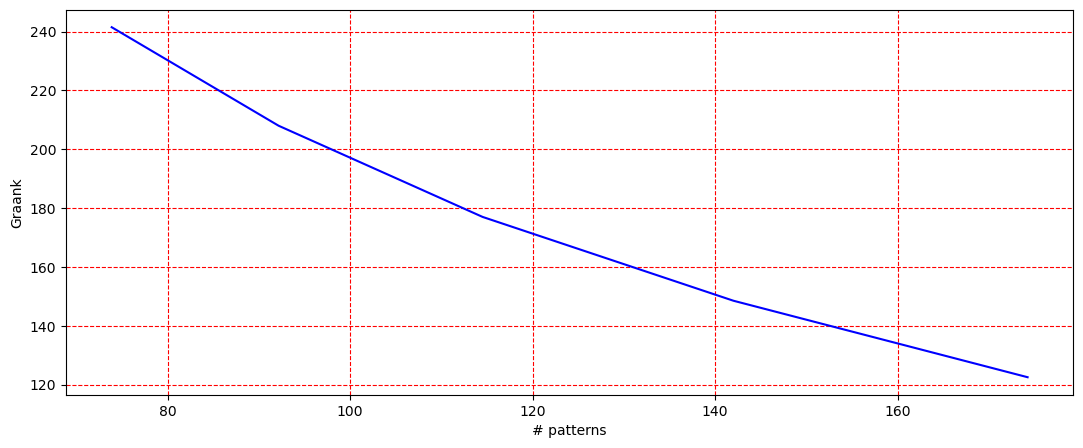

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
fig, ax1 = plt.subplots(figsize=(13, 5))
plt.grid(color='red', linestyle='--')
plt.title("")
plt.xlabel("# patterns")
plt.ylabel("Graank")

ax1.plot(nbr_patterns_graank,minsup_graank, color="blue")

plt.show()

In [19]:
#Grite =>

# (100, 10) -> (50 - 20)
# (100, 20) -> (50 - 42)
# (100, 30) -> (50 - 62)
# (100, 40) -> (50 - 82)
# (100, 50) -> (50 - 102)

In [20]:
#Graant =>

# (100, 10) -> (1225 - 20)
# (100, 20) -> (1225 - 42)
# (100, 30) -> (1225 - 62)
# (100, 40) -> (1225 - 82)
# (100, 50) -> (1225 - 102)

In [22]:
elem = generatItemsetPatternGraant(les_dataset[0], 50)
len(elem) #10 - 230 #20 - 42 #25 - 35, 50-20,50-42

TypeError: computeSupportGraant() missing 1 required positional argument: 'matrix'

# Apply the extraction

------------------------------------------ Statistique de Sgrite ---------------------------------------------



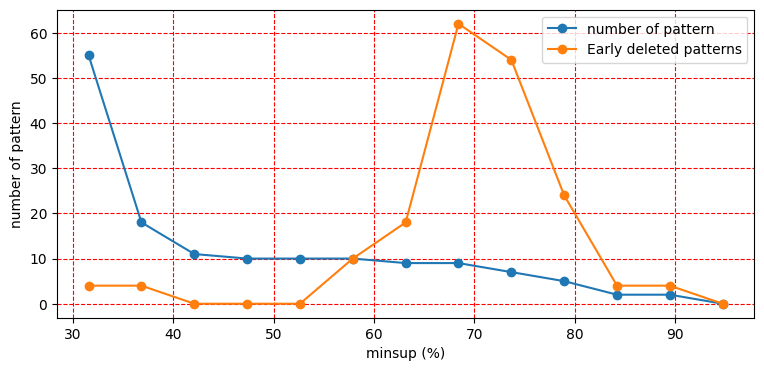

In [ ]:
print('------------------------------------------ Statistique de Sgrite ---------------------------------------------')
neglige = []
nbr_pattern = []
min_sup = []
plt.figure(figsize=(9, 4))

for sup in range(6, len(les_dataset[0])):
        patterns, nbr = generatItemsetPatternModif(les_dataset[0], sup, False)
        nbr_pattern.append(print_pattern_mined(delete_complement(patterns)))
        neglige.append(nbr)
        min_sup.append((sup/19)*100)

plt.grid(color='red', linestyle='--')
plt.xlabel('minsup (%)')
plt.ylabel('number of pattern')
plt.plot(min_sup, nbr_pattern, min_sup, neglige, marker= 'o')
plt.legend(['number of pattern', 'Early deleted patterns'])
print()
# nbr_pattern, strn = generatItemsetPatternModif(les_dataset[0], 4)
# print_pattern_mined(nbr_pattern)


In [ ]:
print('------------------------------------------ Statistique de Grite ---------------------------------------------')
neglige = []
nbr_pattern = []
min_sup = []
plt.figure(figsize=(9, 4))

for sup in range(3, len(les_dataset[0])):
        patterns, nbr = generatItemsetPatternMotifGrite(les_dataset[0], sup)
        nbr_pattern.append(print_pattern_mined(delete_complement(patterns)))
        neglige.append(nbr)
        min_sup.append((sup/19)*100)


plt.grid(color='red', linestyle='--')
plt.xlabel('minsup')

plt.ylabel('number of pattern')

plt.plot(min_sup, nbr_pattern, min_sup, neglige, marker= 'o')
plt.legend(['number of pattern', 'Early deleted patterns'])
neglige = []
nbr_pattern = []
min_sup = []

------------------------------------------ Statistique de Grite ---------------------------------------------


KeyboardInterrupt: ignored

<Figure size 900x400 with 0 Axes>

# Diagramme de temps

------------------------------------------ Statistique de Sgrite ---------------------------------------------


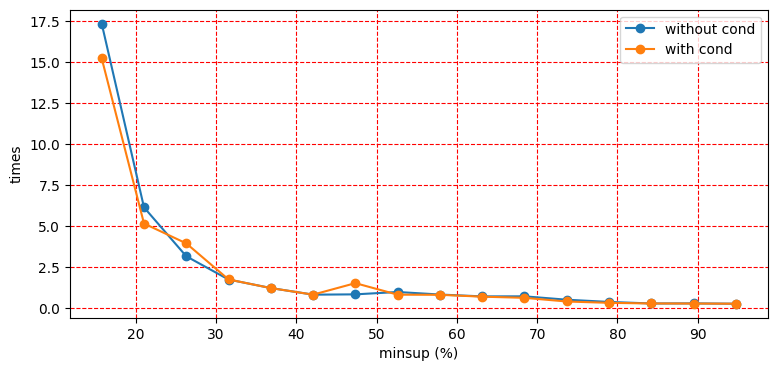

In [ ]:
print('------------------------------------------ Statistique de Sgrite ---------------------------------------------')
min_sup = []
times1 = []
times2 = []
plt.figure(figsize=(9, 4))
# for i_data in range(len(datasets)):
for sup in range(3, len(les_dataset[0])):
        temps1 = time.time()
        patterns = generatItemsetPattern(les_dataset[0], sup, False)
        temps2 = time.time()

        times1.append(temps2 - temps1)

        temps1 = time.time()
        patterns, nbr = generatItemsetPatternModif(les_dataset[0], sup, False)
        temps2 = time.time()

        times2.append(temps2 - temps1)

        min_sup.append((sup/19)*100)

plt.grid(color='red', linestyle='--')
plt.xlabel('minsup (%)')
plt.ylabel('times')
plt.plot(min_sup, times1, min_sup, times2, marker= 'o')
plt.legend(['without cond', 'with cond'])
min_sup = []
times2 = []
times1 = []

------------------------------------------ Statistique de Grite ---------------------------------------------


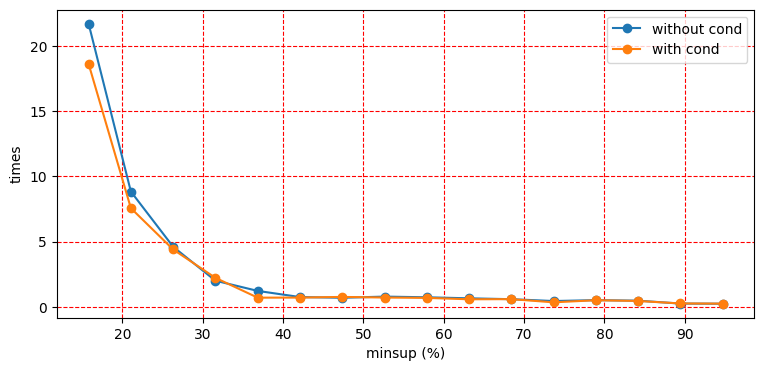

In [ ]:
print('------------------------------------------ Statistique de Grite ---------------------------------------------')
min_sup = []
times1 = []
times2 = []
plt.figure(figsize=(9, 4))
# for i_data in range(len(datasets)):
for sup in range(3, len(les_dataset[0])):
        temps1 = time.time()
        patterns = generatItemsetPatternGrite(les_dataset[0], sup)
        temps2 = time.time()

        times1.append(temps2 - temps1)

        temps1 = time.time()
        patterns, nbr = generatItemsetPatternMotifGrite(les_dataset[0], sup)
        temps2 = time.time()

        times2.append(temps2 - temps1)

        min_sup.append((sup/19)*100)
plt.grid(color='red', linestyle='--')
plt.xlabel('minsup (%)')
plt.ylabel('times')
plt.plot(min_sup, times1, min_sup, times2, marker= 'o')
plt.legend(['without cond', 'with cond'])
min_sup = []
times2 = []
times1 = []

# Introduire la consomation de ram

In [ ]:
datasets = ['/content/sample_data/dataset6.csv']
les_dataset = list(map(lambda x: pd.read_csv(x, sep=' '), datasets))

In [ ]:
les_dataset[0]

,1,2,3,4,5,6,7,8,9,10
0,1,76,4,96,0,42,0,0,45,51
1,5,0,48,25,72,85,36,0,75,0
2,8,0,13,0,0,0,93,0,66,83
3,79,0,75,0,31,0,83,0,14,0
4,1,21,36,70,42,97,0,0,18,18
5,63,0,0,86,77,0,19,0,43,15
6,57,97,18,54,23,0,63,0,2,49
7,80,82,86,91,0,81,96,0,50,0
8,75,91,70,94,38,26,0,0,38,81
9,19,79,30,43,62,7,40,0,76,9


------------------------------------------ Statistique de Grite ---------------------------------------------


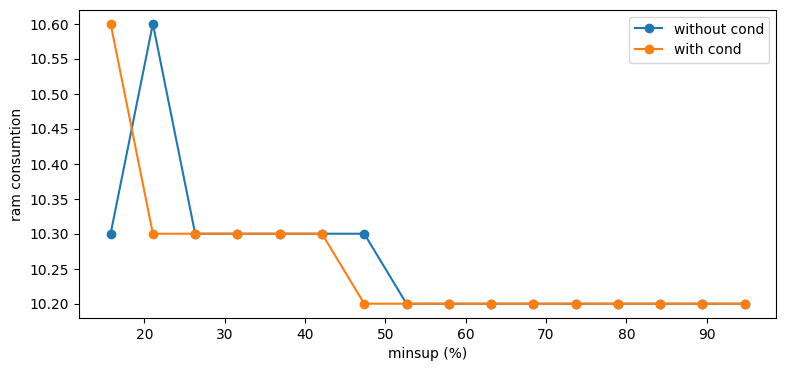

In [ ]:
print('------------------------------------------ Statistique de Grite ---------------------------------------------')
min_sup = []
ram1,ram2 = [],[]
plt.figure(figsize=(9, 4))
for sup in range(3, len(les_dataset[0])):
        ram_num1 = psutil.virtual_memory()[2]
        patterns = generatItemsetPatternGrite(les_dataset[0], sup)
        ram1.append(ram_num1)

        ram_num2 = psutil.virtual_memory()[2]
        patterns, nbr = generatItemsetPatternMotifGrite(les_dataset[0], sup)
        ram_num2 = psutil.virtual_memory()[2]
        ram2.append(ram_num2)
        min_sup.append((sup/19)*100)

plt.xlabel('minsup (%)')
plt.ylabel('ram consumtion')
plt.plot(min_sup, ram1, min_sup, ram2, marker= 'o')
plt.legend(['without cond', 'with cond'])


In [ ]:
print('------------------------------------------ Statistique de Grite ---------------------------------------------')
min_sup = []
ram1,ram2 = [],[]
plt.figure(figsize=(18, 10))
for i_data in range(len(datasets)):
    for sup in range(3, len(les_dataset[i_data])):
        ram_num1 = psutil.virtual_memory()[2]
        patterns = generatItemsetPatternGrite(les_dataset[i_data], sup)
        ram_num2 = psutil.virtual_memory()[2]
        ram1.append(abs(ram_num2-ram_num1)*100)

        ram_num1 = psutil.virtual_memory()[2]
        patterns, nbr = generatItemsetPatternMotifGrite(les_dataset[i_data], sup)
        ram_num2 = psutil.virtual_memory()[2]
        ram2.append(abs(ram_num2-ram_num1)*100)
        min_sup.append(sup)

    plt.title(f'dataset {i_data+1}')
    plt.grid(color='red', linestyle='--')
    plt.xlabel('minsup')
    plt.ylabel('ram consumtion')
    plt.plot(min_sup, ram1, min_sup, ram2, marker= 'o')
    plt.legend(['without cond', 'with cond'])
    min_sup = []
    ram1 = []
    ram2 = []

# execution a tres grand echelle (ce qu'il faut tester sur des machine puissante)

In [ ]:
datasets = ['datasets/dataset8.csv']

In [ ]:
les_dataset = list(map(lambda x: pd.read_csv(x, sep=' '), datasets))

In [ ]:
les_dataset[0]

In [ ]:
print('------------------------------------------ Statistique de Srite ---------------------------------------------')
min_sup = []
times1 = []
times2 = []
plt.figure(figsize=(18, 10))
# for i_data in range(len(datasets)):
for sup in range(3, len(les_dataset[2])):
        temps2 = time.time()
        patterns = generatItemsetPattern(les_dataset[2], sup)
        temps2 = time.time()

        times1.append(temps2 - temps1)

        temps1 = time.time()
        patterns, nbr = generatItemsetPatternModif(les_dataset[2], sup)
        temps2 = time.time()

        times2.append(temps2 - temps1)

        min_sup.append(sup)

plt.title(f'dataset {i_data+1}')
plt.grid(color='red', linestyle='--')
plt.xlabel('minsup')
plt.ylabel('times')
plt.plot(min_sup, times1, min_sup, times2, marker= 'o')
plt.legend(['without cond', 'with cond'])
min_sup = []
times2 = []
times1 = []